<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/Users/caro/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/caro/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/caro/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [7]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [8]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
display(df_erp.duplicated(subset = ["product_id"]).value_counts())
print("Il n'y a pas de product_id en double : ")
# ou en affichant les doublons
df_erp.loc[df_erp.duplicated(keep=False),:]

False    825
dtype: int64

Il n'y a pas de product_id en double : 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
display(df_erp.value_counts("stock_status", dropna=False))
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print("La colonne stock_status est liée à la colonne stock_quantity.")

stock_status
instock       733
outofstock     92
dtype: int64

La colonne stock_status est liée à la colonne stock_quantity.


In [10]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp.loc[df_erp["stock_quantity"] == 0,"stock_status_2"] = "outofstock"
df_erp.loc[df_erp["stock_quantity"] != 0,"stock_status_2"] = "instock"

#Affichage du df pour vérifier la présence de la nouvelle colonne :
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset

nb = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()
if nb == df_erp.shape[0] :
    print("les 2 colonnes sont identiques")
else :
    print("Il y a",df_erp.shape[0] - nb,"lignes pour lesquelles stock_status_2 et stock_status sont différents")


Il y a 4 lignes pour lesquelles stock_status_2 et stock_status sont différents


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp.loc[df_erp["stock_status"]!= df_erp["stock_status_2"],:]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


In [14]:
#Corriger la ou les données incohérentes
# 2 erreurs sur la valeur de stock_status :
df_erp.iloc[[4,398],4] = df_erp.iloc[[4,398],6]

print("Lignes près corrections des 2 premières, on ne tient pas compte des 2 suivantes : ")
df_erp.iloc[[4,398,449,573],:]
#df_erp.loc[df_erp["stock_status"]!= df_erp["stock_status_2"],:]

Lignes près corrections des 2 premières, on ne tient pas compte des 2 suivantes : 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,instock,23.77,instock
398,4885,1,18.7,0,outofstock,9.66,outofstock
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseigné: {}".format((df_erp.loc[df_erp["price"].isnull(),"price"]).count()))
#Afficher le prix minimum de la colonne "price"
print("Minimum de la colonne \'price\': {}€".format(df_erp["price"].min()))
#Afficher le prix maximum de la colonne "price"
print("Maximum de la colonne \'price\': {}€".format(df_erp["price"].max()))

#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
display(df_erp.loc[df_erp["price"] <= 0 , :])
print("\nOn constate que les prix de vente sont environ le double des prix d'achat en valeur absolue",
      "\nIl est possible que ce soit une erreur de signe ",
      "\nPar ailleurs ils ne sont pas disponibles à la vente en ligne actuellement,(onsale_web = 0 )", 
      "\nIls n'entrent pas en compte pas l'étude des ventes (CA,...) : ")

df_liaison.loc[df_liaison['product_id'].isin([4233,5017,6594]),:]

Nombres d'article avec un prix non renseigné: 0
Minimum de la colonne 'price': -20.0€
Maximum de la colonne 'price': 225.0€


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock



On constate que les prix de vente sont environ le double des prix d'achat en valeur absolue 
Il est possible que ce soit une erreur de signe  
Par ailleurs ils ne sont pas disponibles à la vente en ligne actuellement,(onsale_web = 0 ) 
Ils n'entrent pas en compte pas l'étude des ventes (CA,...) : 


,id_web,product_id
151,NaN,4233
469,NaN,5017
739,NaN,6594


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Minimum de la colonne \'stock_quantity\': {}".format(df_erp["stock_quantity"].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Maximum de la colonne \'stock_quantity\': {}".format(df_erp["stock_quantity"].max()))

#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print("\n\n---->        Liste des stocks inférieurs à 0 :       <----")
display(df_erp.loc[df_erp["stock_quantity"] < 0 , :])
print("\nLes valeurs négatives en stock peuvent provenir :\n",
        "         - d'un pb de réapprovionnement auprès du fournisseur ",
        "         - le produit n'a pas été retiré de la vente alors que le stock était insuffisant ",
        "         - pb de gestion de commandes simultannées ",
        "         - erreur de saisie dans la recopie des commandes ",
        "         - erreur de lien avec les commandes enregistrées \n",
        " ----> On peut passer 'onsale_web' à 0 ",
        " ----> On peut laisser les valeurs négatives pour avertir d'un pb à traiter",sep = '\n')


Minimum de la colonne 'stock_quantity': -10
Maximum de la colonne 'stock_quantity': 145


---->        Liste des stocks inférieurs à 0 :       <----


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,instock
573,5700,1,44.5,-1,outofstock,22.30,instock



Les valeurs négatives en stock peuvent provenir :

         - d'un pb de réapprovionnement auprès du fournisseur 
         - le produit n'a pas été retiré de la vente alors que le stock était insuffisant 
         - pb de gestion de commandes simultannées 
         - erreur de saisie dans la recopie des commandes 
         - erreur de lien avec les commandes enregistrées 

 ----> On peut passer 'onsale_web' à 0 
 ----> On peut laisser les valeurs négatives pour avertir d'un pb à traiter


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [17]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
display(df_erp.value_counts("onsale_web",dropna = False))
print("La colonne onsale_web contient 2 valeurs : 0 ou 1",
      "0 indque que le produit n'est pas en vente actuellement sur le site",
      "1 indique le produit est en vente sur le site", sep = '\n')

onsale_web
1    716
0    109
dtype: int64

La colonne onsale_web contient 2 valeurs : 0 ou 1
0 indque que le produit n'est pas en vente actuellement sur le site
1 indique le produit est en vente sur le site


In [18]:
#Quelles sont les colonnes à conserver selon vous?
print("Toutes les colonnes sont à conserver sauf stock_status_2")

Toutes les colonnes sont à conserver sauf stock_status_2


In [19]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(columns = "stock_status_2", inplace = True)
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [20]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombres d'article avec un prix d'achat non renseigné: {}".format((df_erp.loc[df_erp["purchase_price"].isnull(),"purchase_price"]).count())) #Saisir l'instruction manquante dans la fonction format

#Afficher le prix minimum de la colonne "purchase_price"
print("Minimum de la colonne \'purchase_price\': {}€".format(df_erp["purchase_price"].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Maximum de la colonne \'purchase_price\': {}€".format(df_erp["purchase_price"].max()))


Nombres d'article avec un prix d'achat non renseigné: 0
Minimum de la colonne 'purchase_price': 2.74€
Maximum de la colonne 'purchase_price': 137.81€


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [21]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))


Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [22]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [23]:
#Selon vous, quelles sont les colonnes à conserver ?
df_web.iloc[:,[0,5,12,13]]

,sku,total_sales,product_type,post_title
0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012
1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016
3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017
...,...,...,...,...
1508,16326,5.0,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018
1509,15662,15.0,Vin,Chermette Domaine du Vissoux Beaujolais Griott...
1510,15329,3.0,Vin,Agnès Levet Côte Rôtie Péroline 2017
1511,14827,7.0,Vin,Marc Colin Et Fils Chassagne-Montrachet Blanc ...


In [24]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
#colonnes à supprimer = liste totale moins les 4 col à garder :
labels = df_web.columns.drop({"sku","total_sales","product_type","post_title"})
#suppression des colonnes
df_web.drop(columns = labels, inplace = True )
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1428 non-null   object 
 1   total_sales   1430 non-null   float64
 2   product_type  1429 non-null   object 
 3   post_title    1430 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.4+ KB


In [25]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la règle de codification?
df_web.loc[df_web["sku"].str.isnumeric() == False,"sku"]

272                 13127-1
842     bon-cadeau-25-euros
1117                13127-1
1387    bon-cadeau-25-euros
Name: sku, dtype: object

In [26]:
#Si vous avez identifié des codes articles ne respectant pas la règle de codification, consultez-les?
df_web.loc[(df_web["sku"] == "13127-1") | (df_web["sku"] == "bon-cadeau-25-euros")]

,sku,total_sales,product_type,post_title
272,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
842,bon-cadeau-25-euros,7.0,Autre,Bon cadeau de 25€
1117,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€


In [27]:
#Identifier les lignes sans code articles
df_web.loc[df_web["sku"].isna()]

,sku,total_sales,product_type,post_title
8,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN
...,...,...,...,...
1384,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN


In [28]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
# 1 - Suppression des lignes entièrement vides :
print("Suppression des lignes entièrement vides...")
df_web.dropna(how ='all', inplace = True)
# 2 - Affichage des sku vides restant (lignes non entièrement vides):
print("\nLignes restantes sans sku :")
df = df_web.loc[df_web["sku"].isna()]
display(df)

print("Recherchons les autres lignes ayant le même post_title : ")
for title in df.post_title :
    display(df_web.loc[df_web["post_title"]== title])
    
print("----> Ces articles n'ont pas de sku correspondant, on supprime pour la jointure à venir")
df_web.loc[df_web["total_sales"]<0,:]
df_web = df_web.drop([1084,1087])

Suppression des lignes entièrement vides...

Lignes restantes sans sku :


,sku,total_sales,product_type,post_title
1084,NaN,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018
1087,NaN,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017


Recherchons les autres lignes ayant le même post_title : 


,sku,total_sales,product_type,post_title
1084,NaN,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018


,sku,total_sales,product_type,post_title
1087,NaN,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017


----> Ces articles n'ont pas de sku correspondant, on supprime pour la jointure à venir


In [29]:
#La clé pour chaque ligne est-elle unique? ou autrement dit, y a-t-il des doublons?
print("Il y a {} doublons pour la clé 'sku' ".format(df_web[df_web.sku.duplicated()].sku.count()))
#suppression des doublons pour les lignes entièrement identiques
df_web.drop_duplicates(inplace = True)
print("Les lignes entièrement identiques ont été supprimées.")
print("Il reste maintenant ces doublons pour la clé 'sku' :")
display(df_web.loc[df_web["sku"].isin(df_web[df_web.sku.duplicated()].sku),:])

print("\nLes différences concernent le type et surtout le nb de ventes.",
     "\n\nLes nb de vente les plus élevées semblent être une erreur, supprimons-les.")
df_web = df_web.drop([114,219,452,523,1387])
print("reset index :")
df_web.reset_index()

Il y a 714 doublons pour la clé 'sku' 
Les lignes entièrement identiques ont été supprimées.
Il reste maintenant ces doublons pour la clé 'sku' :


,sku,total_sales,product_type,post_title
114,14561,111.0,Vin,Argentine Mendoza Alamos Torrontes 2017
219,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017
452,14950,122.0,Vin,François Baur Pinot Noir Schlittweg 2017
523,1366,116.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010
548,1366,6.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010
842,bon-cadeau-25-euros,7.0,Autre,Bon cadeau de 25€
843,15346,2.0,Vin,Albert Mann Pinot Noir Grand H 2017
999,14950,22.0,Vin,François Baur Pinot Noir Schlittweg 2017
1052,14561,11.0,Vin,Argentine Mendoza Alamos Torrontes 2017
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€



Les différences concernent le type et surtout le nb de ventes. 

Les nb de vente les plus élevées semblent être une erreur, supprimons-les.
reset index :


,index,sku,total_sales,product_type,post_title
0,0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012
1,1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...
2,2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016
3,3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
4,4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017
...,...,...,...,...,...
709,1325,16043,10.0,Vin,Pierre Gaillard Saint-Joseph Rouge 2018
710,1327,15845,9.0,Vin,Château Jean Faure Saint-Emilion Grand Cru 2016
711,1339,15951,9.0,Vin,Jacqueson Rully Rouge 1er Cru Les Preaux 2018
712,1353,13074,4.0,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...


In [30]:
#Les lignes sans code article semble être toutes non renseignées
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df = df_web.loc[df_web["sku"].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur renseignées dans chacune des colonnes
df.info()
#3 - Que constatez-vous?
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   0 non-null      float64
 2   product_type  0 non-null      object 
 3   post_title    0 non-null      object 
dtypes: float64(1), object(3)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           714 non-null    object 
 1   total_sales   714 non-null    float64
 2   product_type  714 non-null    object 
 3   post_title    714 non-null    object 
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [31]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))

#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [32]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [33]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison.duplicated(subset = ["product_id"],keep=False).value_counts()

False    825
dtype: int64

In [34]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
display(df_liaison.duplicated(subset = ["id_web"],keep=False).value_counts())
display(df_liaison.value_counts("id_web",dropna=False))
print("Nb doublons = nb de NaN ==> Il n'y a donc pas de doublons mais 91 id_web non renseignées")

False    734
True      91
dtype: int64

id_web
NaN        91
15733.0     1
15735.0     1
15736.0     1
15737.0     1
           ..
14845.0     1
14855.0     1
14856.0     1
14864.0     1
15373.0     1
Length: 735, dtype: int64

Nb doublons = nb de NaN ==> Il n'y a donc pas de doublons mais 91 id_web non renseignées


In [35]:
#Avons-nous des articles sans correspondances?
nb_vide = df_liaison["id_web"].isna().sum()
print("Il y a",nb_vide,"articles sans correspondances")

Il y a 91 articles sans correspondances


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [36]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge (df_erp,df_liaison, how ='left', on = 'product_id')
df_merge

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,instock,23.77,19815
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,NaN
821,7204,0,45.0,9,instock,24.18,NaN
822,7247,1,54.8,6,instock,27.18,13127-1
823,7329,0,26.5,14,instock,13.42,14680-1


In [37]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
display(df_merge.info())
nb_vide = df_merge["id_web"].isna().sum()
print("Il y a toujours {} valeurs de product_id ne matchant pas avec un id_web.".format(nb_vide))
print(" ---> Donc pas de perte supplémentaire lors de la jointure.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          734 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 51.6+ KB


None

Il y a toujours 91 valeurs de product_id ne matchant pas avec un id_web.
 ---> Donc pas de perte supplémentaire lors de la jointure.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [38]:
#Fusionnez les datasets df_merge et df_web
df_merge = df_merge.fillna(0)
df_merge_all = pd.merge (df_merge,df_web, how = 'left', left_on = 'id_web', right_on = 'sku')
display(df_merge_all)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title
0,3847,1,24.2,16,instock,12.88,15298,15298,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018
1,3849,1,34.3,10,instock,17.54,15296,15296,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
2,3850,1,20.8,0,outofstock,10.64,15300,15300,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,1,14.1,26,instock,6.92,19814,19814,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,1,46.0,3,instock,23.77,19815,19815,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017
...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,0,NaN,NaN,NaN,NaN
821,7204,0,45.0,9,instock,24.18,0,NaN,NaN,NaN,NaN
822,7247,1,54.8,6,instock,27.18,13127-1,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
823,7329,0,26.5,14,instock,13.42,14680-1,NaN,NaN,NaN,NaN


In [39]:
#Avons-nous des lignes sans correspondances?
print("Les caractéristiques du résultat de la jonction :\n")
display(df_merge_all.info())
print("\nCi-dessous les lignes où les id_web n'ont pas de sku :")
df = df_merge_all.loc[df_merge_all["sku"].isnull() & (df_merge_all["id_web"]!=0)]
display(df)
print("Il y a {0} id_web ne matchant pas avec un sku = 0 ventes pour ces {0} id_web?".format(df.shape[0]))

print("\n---> Il y a donc {} + {} = {} lignes sans correspondance.".format(nb_vide,df.shape[0],nb_vide+df.shape[0]))

Les caractéristiques du résultat de la jonction :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   id_web          825 non-null    object 
 7   sku             714 non-null    object 
 8   total_sales     714 non-null    float64
 9   product_type    714 non-null    object 
 10  post_title      714 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 77.3+ KB


None


Ci-dessous les lignes où les id_web n'ont pas de sku :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title
193,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaN,NaN
236,4568,0,21.5,0,outofstock,11.22,15065,NaN,NaN,NaN,NaN
241,4584,0,32.3,0,outofstock,17.36,14785,NaN,NaN,NaN,NaN
355,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaN,NaN
391,4864,0,8.3,0,outofstock,9.99,15154,NaN,NaN,NaN,NaN
394,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaN,NaN
424,4921,0,13.8,0,outofstock,7.13,15608,NaN,NaN,NaN,NaN
425,4922,0,21.5,0,outofstock,10.55,15586,NaN,NaN,NaN,NaN
470,5018,0,15.4,0,outofstock,7.72,15272,NaN,NaN,NaN,NaN
473,5021,0,17.1,0,outofstock,8.92,15630,NaN,NaN,NaN,NaN


Il y a 20 id_web ne matchant pas avec un sku = 0 ventes pour ces 20 id_web?

---> Il y a donc 91 + 20 = 111 lignes sans correspondance.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

Text(0, 0.5, 'Prix de vente')

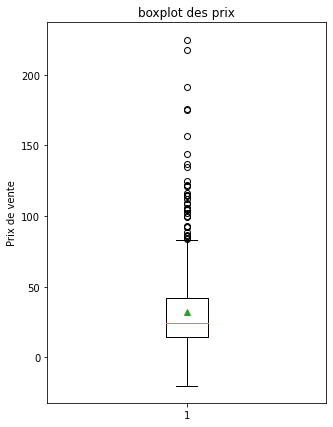

In [40]:
#Importation de ... pyplot de la librairie matplotlib
import matplotlib.pyplot as plt

#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
figure = plt.figure(figsize = (5, 7))
plt.boxplot(df_merge_all.price, showmeans=True)
plt.title("boxplot des prix")
plt.ylabel('Prix de vente')

In [42]:
#Autre méthode avec plotly express
fig = px.box(df_merge_all, y="price")
fig.show()

#fig_type = px.box(df_merge_all,x= "product_type", y="price")
#fig_type.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [43]:
#Calculer la moyenne du prix
moy = round(df_merge_all["price"].mean(),2)
print("La moyenne des prix: ",moy,"€")
#Calculer l'écart-type du prix
std = round(df_merge_all["price"].std(),2)
print("L'écart-type' des prix: ",std,"€")

#Calculer le Z-score
df_merge_all["Z"] = (df_merge_all["price"] - moy)/std
df_merge_all

La moyenne des prix:  32.19 €
L'écart-type' des prix:  26.71 €


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,Z
0,3847,1,24.2,16,instock,12.88,15298,15298,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,-0.299139
1,3849,1,34.3,10,instock,17.54,15296,15296,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.078997
2,3850,1,20.8,0,outofstock,10.64,15300,15300,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,-0.426432
3,4032,1,14.1,26,instock,6.92,19814,19814,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,-0.677274
4,4039,1,46.0,3,instock,23.77,19815,19815,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,0.517035
...,...,...,...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,0,NaN,NaN,NaN,NaN,0.479596
821,7204,0,45.0,9,instock,24.18,0,NaN,NaN,NaN,NaN,0.479596
822,7247,1,54.8,6,instock,27.18,13127-1,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.846499
823,7329,0,26.5,14,instock,13.42,14680-1,NaN,NaN,NaN,NaN,-0.213029


In [44]:
#Quel est le seuil prix dont z-score est supérieur à 3?
px_seuil = (3*std)+moy
print("Le prix seuil pour un z-score supérieur à 3 est de {:.4}€".format(px_seuil))

Le prix seuil pour un z-score supérieur à 3 est de 112.3€


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [45]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_all.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,Z
count,825.000000,825.000000,825.000000,825.000000,825.000000,714.000000,825.000000
mean,5162.597576,0.867879,32.187697,21.589091,16.940582,8.054622,-0.000086
std,902.644635,0.338828,26.712077,21.933807,14.561840,4.161344,1.000078
min,3847.000000,0.000000,-20.000000,-10.000000,2.740000,0.000000,-1.953950
25%,4348.000000,1.000000,14.500000,7.000000,7.590000,5.000000,-0.662299
50%,4907.000000,1.000000,24.300000,18.000000,12.710000,8.000000,-0.295395
75%,5805.000000,1.000000,42.000000,30.000000,22.020000,11.000000,0.367278
max,7338.000000,1.000000,225.000000,145.000000,137.810000,36.000000,7.218645


In [46]:
#Définissez un seuil pour les articles "outliers" en prix
print(round(px_seuil,2),"€")

112.32 €


In [47]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nb_out = df_merge_all[df_merge_all.price > px_seuil].shape[0]
pct = nb_out/df_merge_all.shape[0]
print("{} outliers soit {:.2%}".format(nb_out,pct))

17 outliers soit 2.06%


In [56]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
df = df_merge_all[df_merge_all.price > px_seuil]
display(df)
print("","","",sep = "\n")
#type : champagne, alcool fort, Grand cru, nb ventes >0, prix autour de 2 prix d'achat (comme pour la moyenne)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,Z,CA,pct_CA,cumul_pct_CA,pct_qte,cumul_pct_qte
150,4352,1,225.0,0,outofstock,137.81,15940,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,7.218645,2475.0,1.722577,24.408808,0.191271,35.872022
393,6212,1,115.0,16,instock,59.42,13996,13996,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,3.100337,805.0,0.560272,60.982767,0.121718,75.239089
472,5892,1,191.3,98,instock,116.06,14983,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,5.956945,1147.8,0.798858,74.383439,0.104330,84.593984
528,6202,1,116.4,12,instock,63.15,15126,15126,5.0,Vin,Domaine Clerget Echezeaux Grand Cru En Orveaux...,3.152752,582.0,0.405067,83.776877,0.086941,90.193010
568,6126,1,135.0,138,instock,80.33,14923,14923,5.0,Champagne,Champagne Gosset Célébris Vintage 2007,3.849120,675.0,0.469794,78.830123,0.086941,93.670666
577,4406,1,157.0,12,instock,69.08,7819,7819,4.0,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans...,4.672782,628.0,0.437082,89.615403,0.069553,94.296644
584,5767,1,175.0,12,instock,90.42,15185,15185,4.0,Vin,Camille Giroud Clos de Vougeot 2016,5.346687,700.0,0.487193,90.975925,0.069553,94.783516
586,6215,1,115.0,14,instock,56.45,12790,12790,4.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Champa...,3.100337,460.0,0.320156,91.665791,0.069553,94.922622
641,5917,1,122.0,12,instock,54.24,14775,14775,3.0,Whisky,Wemyss Malts Single Cask Scotch Whisky Choc 'n...,3.362411,366.0,0.254733,92.572388,0.052165,98.295949
642,6213,1,121.0,9,instock,63.14,15072,15072,3.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,3.324972,363.0,0.252645,92.825033,0.052165,98.348113


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [57]:
##############################
# Calculer le CA du site web #
##############################

#Créez une colonne calculant le CA par article
df_merge_all["CA"]  = df_merge_all["price"]* df_merge_all["total_sales"]
#Calculez la somme de la colonne "ca_par_article"
CA_total = df_merge_all["CA"].sum()
#Ce résultat correspond au chiffre d'affaire du site web
print("Le chiffre d'affaire total pour le mois d'octobre est de {:,.8}€".format(CA_total).replace(","," "))

Le chiffre d'affaire total pour le mois d'octobre est de 143 680.1€


In [58]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge_all = df_merge_all.sort_values("CA", ascending = False)

#Réinitialiser l'index du dataset par un reset_index
df_merge_all.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en CA
df = df_merge_all.head(20)
display(df)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df,x ='post_title', y='CA',labels = {'post_title':'','CA':'Chiffre d\'affaire'},text_auto='.2s',height=800)
fig.update_layout(title_text= "TOP 20 des ventes en chiffre d'affaire", xaxis_tickangle=45)
fig.show()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,Z,CA,pct_CA,cumul_pct_CA,pct_qte,cumul_pct_qte
0,4352,1,225.0,0,outofstock,137.81,15940,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,7.218645,2475.0,1.722577,24.408808,0.191271,35.872022
1,5892,1,191.3,98,instock,116.06,14983,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,5.956945,1147.8,0.798858,74.383439,0.104330,84.593984
2,4353,1,79.5,127,instock,45.91,12587,12587,14.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,1.771247,1113.0,0.774638,6.700302,0.243436,12.015302
3,5826,1,41.2,34,instock,21.71,15325,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,0.337327,824.0,0.573496,1.887318,0.347766,2.625630
4,6212,1,115.0,16,instock,59.42,13996,13996,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,3.100337,805.0,0.560272,60.982767,0.121718,75.239089
5,5026,1,86.8,101,instock,50.13,13913,13913,9.0,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,2.044553,781.2,0.543708,40.888265,0.156495,60.685098
6,5008,1,105.0,12,instock,56.42,11602,11602,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2.725945,735.0,0.511553,62.316215,0.121718,76.334551
7,5767,1,175.0,12,instock,90.42,15185,15185,4.0,Vin,Camille Giroud Clos de Vougeot 2016,5.346687,700.0,0.487193,90.975925,0.069553,94.783516
8,6126,1,135.0,138,instock,80.33,14923,14923,5.0,Champagne,Champagne Gosset Célébris Vintage 2007,3.849120,675.0,0.469794,78.830123,0.086941,93.670666
9,5025,1,112.0,136,instock,68.60,13914,13914,6.0,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2.988019,672.0,0.467706,69.007329,0.104330,87.723874


In [59]:
#############################
# Calculer le 20 / 80 en CA #
#############################
#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge_all["pct_CA"]  = df_merge_all["CA"]*100/CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_all["cumul_pct_CA"] = df_merge_all["pct_CA"].cumsum()
display(df_merge_all)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
pct80 = df_merge_all.loc[df_merge_all["cumul_pct_CA"]>=80,'product_id'].count()
print (pct80,"produits représentent 80% des ventes EN CHIFFRE D'AFFAIRE")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print ("Cela représente {:.1%} des produits du catalogue".format(pct80/df_merge_all.product_id.count()))

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,sku,total_sales,product_type,post_title,Z,CA,pct_CA,cumul_pct_CA,pct_qte,cumul_pct_qte
0,4352,1,225.0,0,outofstock,137.81,15940,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,7.218645,2475.0,1.722577,1.722577,0.191271,35.872022
1,5892,1,191.3,98,instock,116.06,14983,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,5.956945,1147.8,0.798858,2.521435,0.104330,84.593984
2,4353,1,79.5,127,instock,45.91,12587,12587,14.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,1.771247,1113.0,0.774638,3.296072,0.243436,12.015302
3,5826,1,41.2,34,instock,21.71,15325,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,0.337327,824.0,0.573496,3.869569,0.347766,2.625630
4,6212,1,115.0,16,instock,59.42,13996,13996,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,3.100337,805.0,0.560272,4.429841,0.121718,75.239089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,7200,0,31.0,6,instock,15.54,0,NaN,NaN,NaN,NaN,-0.044553,NaN,NaN,NaN,NaN,NaN
821,7201,0,31.0,18,instock,16.02,0,NaN,NaN,NaN,NaN,-0.044553,NaN,NaN,NaN,NaN,NaN
822,7203,0,45.0,30,instock,23.48,0,NaN,NaN,NaN,NaN,0.479596,NaN,NaN,NaN,NaN,NaN
823,7204,0,45.0,9,instock,24.18,0,NaN,NaN,NaN,NaN,0.479596,NaN,NaN,NaN,NaN,NaN


280 produits représentent 80% des ventes EN CHIFFRE D'AFFAIRE
Cela représente 33.9% des produits du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [60]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge_all = df_merge_all.sort_values("total_sales", ascending = False)
#Réinitialiser l'index du dataset par un reset_index
df_merge_all.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
df = df_merge_all.head(20).loc[:,["post_title","product_type","total_sales","purchase_price","price","CA"]]
display(df)
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df,x ='post_title', y='total_sales',labels = {'post_title':'','total_sales':'Nombre de ventes'},text_auto='.2s',height=800)
fig.update_layout(title_text= "TOP 20 du nombre de ventes", xaxis_tickangle=45)
fig.show()

,post_title,product_type,total_sales,purchase_price,price,CA
0,Château De La Selve IGP Coteaux de l'Ardèche M...,Vin,36.0,4.86,9.9,356.4
1,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,Vin,27.0,5.01,9.9,267.3
2,I Fabbri Chianti Classico Lamole 2017,Vin,24.0,7.78,14.9,357.6
3,François Baur Pinot Noir Schlittweg 2017,Vin,22.0,6.82,12.7,279.4
4,Bernard Baudry Chinon Rouge La Croix Boissée 2017,Vin,22.0,14.14,28.5,627.0
5,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Vin,20.0,2.74,5.2,104.0
6,Agnès Levet Côte Rôtie Améthyste 2017,Vin,20.0,21.71,41.2,824.0
7,Xavier Frissant Touraine Amboise Chenin Les Pi...,Vin,18.0,5.75,11.6,208.8
8,Decelle-Villa Chorey-Lès-Beaune 2016,Vin,17.0,15.28,29.0,493.0
9,Maurel Pays d'Oc Merlot 2018,Vin,17.0,3.09,5.8,98.6


In [61]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
qte_total = df_merge_all["total_sales"].sum()
df_merge_all["pct_qte"]  = df_merge_all["total_sales"]*100/qte_total

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_all["cumul_pct_qte"] = df_merge_all["pct_qte"].cumsum()
df_merge_all

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
pct80 = df_merge_all.loc[df_merge_all["cumul_pct_qte"]<=80,'product_id'].count()
print (pct80, "produits représentent 80% des ventes EN QUANTITE")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print ("Cela représente {:.1%} des produits du catalogue".format(pct80/df_merge_all.product_id.count()))

433 produits représentent 80% des ventes EN QUANTITE
Cela représente 52.5% des produits du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [62]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Rotation de stock
df_merge_all.loc[df_merge_all["total_sales"] != 0,"Rota_stock"]  = 12 * df_merge_all.loc[df_merge_all["total_sales"] != 0,"stock_quantity"] / df_merge_all.loc[df_merge_all["total_sales"] != 0,"total_sales"]

#Remplacement des "inf" par 0
df_merge_all.loc[df_merge_all["total_sales"] == 0,"Rota_stock"]  = 0
#df.replace([np.inf, -np.inf], 0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge_all = df_merge_all.sort_values("Rota_stock", ascending = False)
df_merge_all.reset_index(drop=True, inplace=True)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df = df_merge_all.head(20)
fig = px.bar(df,x ='post_title', y='Rota_stock',labels = {'post_title':'','Rota_stock':'Durée de stockage'},text_auto='.2s',height=800)
fig.update_layout(title_text= "FLOP 20 du nombre des durées de stockage (mois)", xaxis_tickangle=45)
fig.show()

In [63]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge_all["Valorisation_stock_euros"]  = df_merge_all["price"]* df_merge_all["stock_quantity"]

#Calculer la somme de la colonne "Valorisation_stock_euros"
all_stock_value = df_merge_all["Valorisation_stock_euros"].sum()
print("Les stocks équivalent à {:,.8}€".format(all_stock_value).replace(","," "))

Les stocks équivalent à 531 628.8€


In [64]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
qty_stock = df_merge_all["stock_quantity"].sum()
print("Le stock compte {:,} articles ".format(qty_stock).replace(","," "))

Le stock compte 17 811 articles 


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [65]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge_all["prix_HT"] = df_merge_all["price"] * 0.8

#Création de la colonne Taux de marge
df_merge_all["Taux_de_marge"] = (df_merge_all["prix_HT"] - df_merge_all["purchase_price"])/ df_merge_all["prix_HT"]*100
#Afficher le prix minimum de la colonne "taux_marge"
print("Taux de marge minimum : {:.4}%".format(df_merge_all["Taux_de_marge"].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Taux de marge maximum : {:.4}%".format(df_merge_all["Taux_de_marge"].max()))


Taux de marge minimum : -665.6%
Taux de marge maximum : 167.8%


In [66]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge_all.loc[df_merge_all["Taux_de_marge"]<0, ["product_id","post_title","product_type","total_sales","purchase_price","price","CA","Taux_de_marge"]]

,product_id,post_title,product_type,total_sales,purchase_price,price,CA,Taux_de_marge
687,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Champagne,0.0,77.48,12.65,0.0,-665.612648
741,4864,NaN,NaN,NaN,9.99,8.30,NaN,-50.451807
769,6324,NaN,NaN,NaN,99.00,92.00,NaN,-34.510870
819,7196,NaN,NaN,NaN,31.20,31.00,NaN,-25.806452


In [67]:
#création d'un dataframe avec les taux positifs
df = df_merge_all.loc[df_merge_all["Taux_de_marge"]>0,:]
#Afficher le prix minimum de la colonne "taux_marge"
print("Taux de marge minimum : {:.4}%".format(df["Taux_de_marge"].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Taux de marge maximum : {:.4}%".format(df["Taux_de_marge"].max()))


Taux de marge minimum : 19.56%
Taux de marge maximum : 167.8%


In [68]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df = df.groupby("product_type").mean().sort_values("Taux_de_marge").reset_index()
display(df)
#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(df,x ='product_type', y='Taux_de_marge',labels = {'product_type':'','Taux_de_marge':'Taux de marge (%)'},text_auto='.2s',height=800)
fig.update_layout(title_text= "Taux de marge par type de produit (%)", xaxis_tickangle=45)
fig.show()

,product_type,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,Z,CA,pct_CA,cumul_pct_CA,pct_qte,cumul_pct_qte,Rota_stock,Valorisation_stock_euros,prix_HT,Taux_de_marge
0,Huile d'olive,5759.000000,1.00000,24.933333,52.666667,15.450000,7.333333,-0.271684,165.900000,0.115465,72.216217,0.127514,72.735176,70.914286,1043.900000,19.946667,21.873123
1,Champagne,4560.888889,1.00000,71.737037,103.592593,42.930370,6.259259,1.480608,478.837037,0.333266,35.858401,0.108838,79.951313,203.671252,7083.551852,57.389630,25.508894
2,Autre,4954.000000,1.00000,25.000000,23.000000,13.300000,7.000000,-0.269188,175.000000,0.121798,69.549158,0.121718,79.377500,39.428571,575.000000,20.000000,33.500000
3,Vin,5056.762918,0.99848,29.281307,20.469605,15.145106,8.291793,-0.108899,187.717325,0.130649,67.990376,0.144180,62.559703,27.905000,428.896125,23.425046,35.429440
4,Gin,5913.500000,1.00000,36.000000,5.500000,17.160000,7.000000,0.142643,252.000000,0.175390,51.405588,0.121718,74.126239,10.200000,198.000000,28.800000,40.416667
5,Whisky,4827.285714,1.00000,65.557143,6.071429,29.937143,3.428571,1.249238,206.185714,0.143503,62.413731,0.059617,93.953847,20.526531,430.921429,52.445714,42.623818
6,Cognac,4594.625000,1.00000,97.500000,12.375000,44.286250,4.375000,2.445152,396.275000,0.275804,30.220151,0.076074,88.747609,28.289286,1220.150000,78.000000,42.778764


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

,stock_quantity,total_sales,price
stock_quantity,1.000000,0.438901,-0.086305
total_sales,0.438901,1.000000,-0.516258
price,-0.086305,-0.516258,1.000000


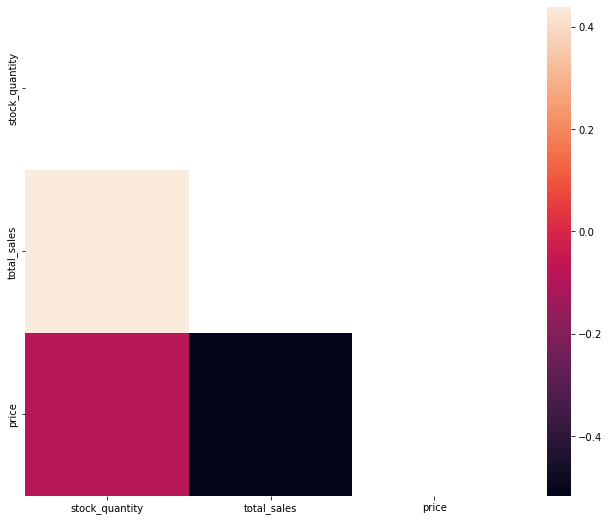

In [69]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

df = df_merge_all.loc[:,["stock_quantity","total_sales","price"]]

corr = df.corr()

#Création d'un heatmap de correlation avec les variables stock, sales et price
display(corr)

#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,mask=mask)
#,cmap='BrBG'
plt.show()



In [70]:
#Que peut-on conclure des correlations ?
print("1 - Les prix et la quantité du stock semblent négativement corrélés (-0,086)",
     "2 - Le nb de ventes et la quantité du stock semblent positivement corrélés (+0,44)",
     "3 - Le nb de ventes et les prix semblent négativement corrélés (-0,52)", sep = "\n\n")

1 - Les prix et la quantité du stock semblent négativement corrélés (-0,086)

2 - Le nb de ventes et la quantité du stock semblent positivement corrélés (+0,44)

3 - Le nb de ventes et les prix semblent négativement corrélés (-0,52)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [72]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge_all.to_excel("output.xlsx",
             sheet_name='Jeu de donnees final',index = False)  
